In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os

In [2]:
file_path = r'D:\5_Semester\Stats PROJECT\Crime-data-1\Data\IPC_Crimes_groupby_age\SSL.csv'
murder_data = pd.read_csv(file_path, on_bad_lines='skip')

In [3]:
# Capitalize each word in the 'STATE/UT' column
murder_data['STATE/UT'] = murder_data['STATE/UT'].str.upper()
murder_data['CRIME HEAD'] = murder_data['CRIME HEAD'].str.upper()


In [4]:
# Processing the data adding all the values in the Victims_Total column and grouping by year
year_wise = murder_data.groupby('Year')['Grand Total'].sum()
state_wise = murder_data.groupby('STATE/UT')['Grand Total'].sum().sort_values()
state_wise_other = state_wise.sort_values(ascending=False)
others = state_wise_other[state_wise_other/state_wise_other.sum() < 0.025].sum()
state_wise_other = state_wise_other[state_wise_other/state_wise_other.sum() >= 0.025]
state_wise_other['Others'] = others

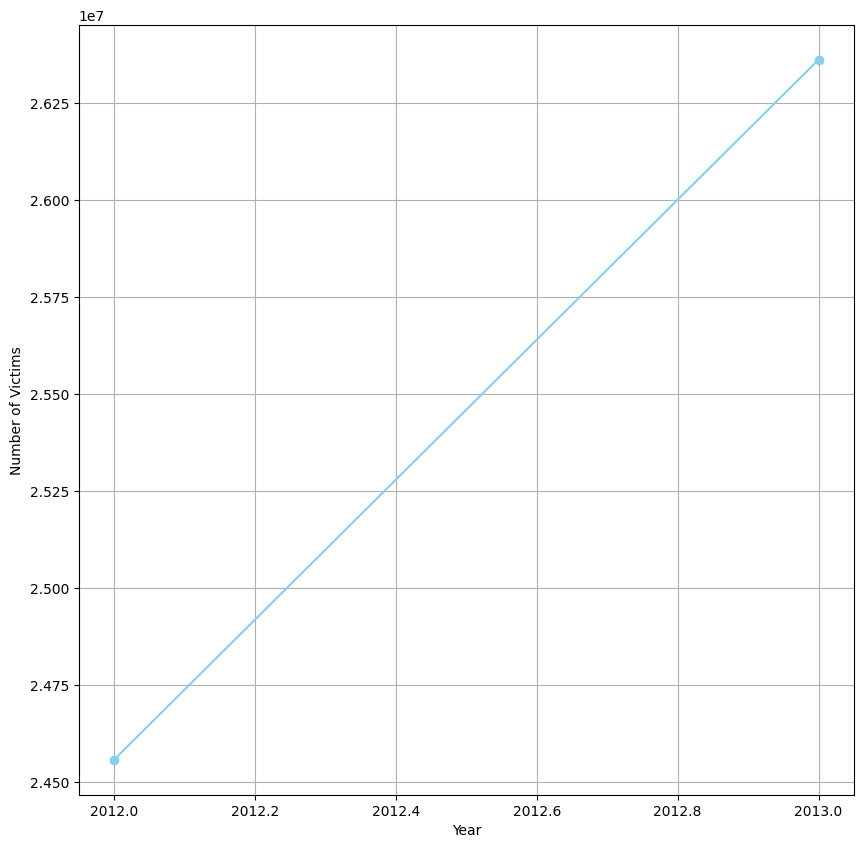

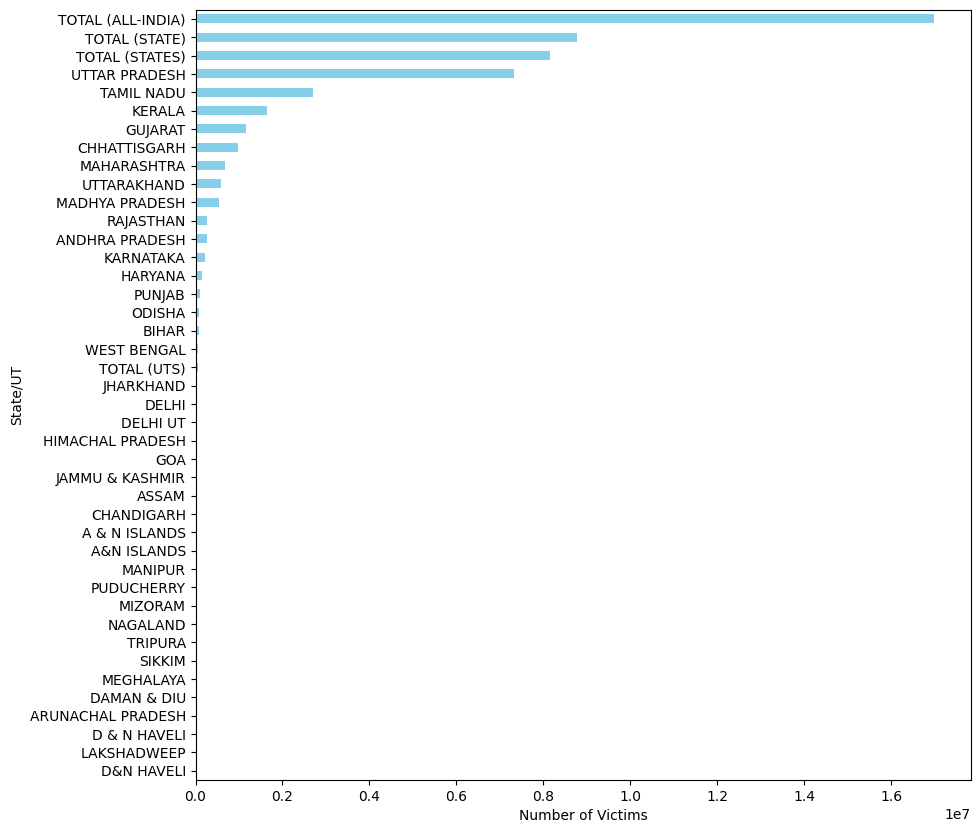

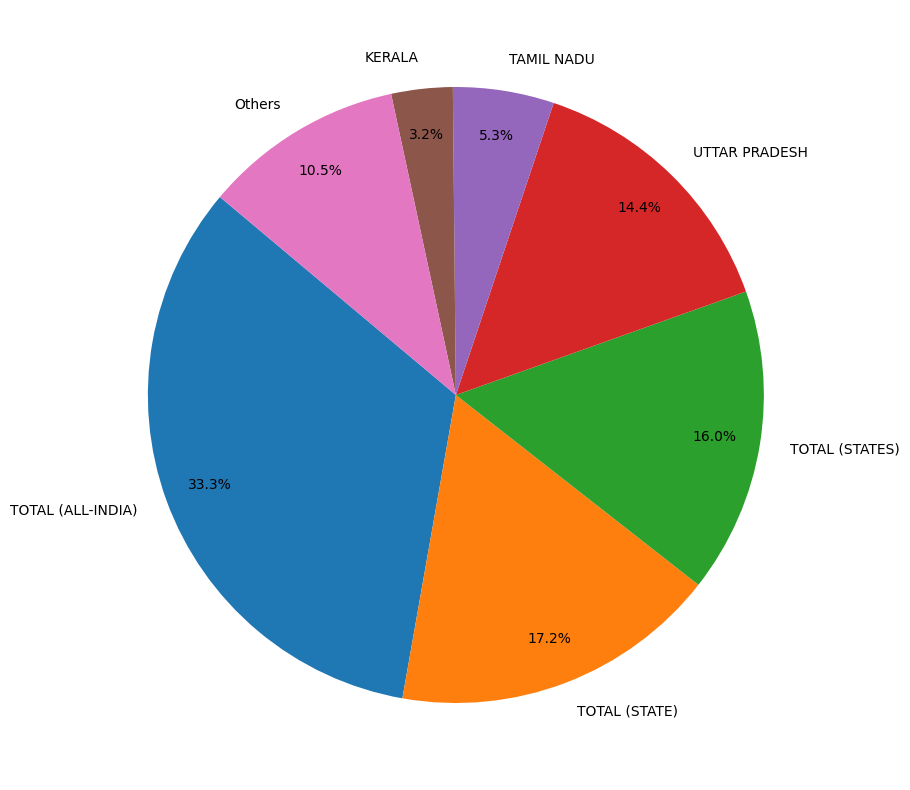

In [5]:
# plotting the data points in 2D
plt.figure(figsize=(10,10))
year_wise.plot(kind='line',marker='o',color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,10))
state_wise.plot(kind='barh',color='skyblue')
plt.xlabel('Number of Victims')
plt.ylabel('State/UT')
plt.show()

plt.figure(figsize=(10,10))
state_wise_other.plot(kind='pie',autopct='%1.1f%%',startangle=140,pctdistance=0.85)
plt.ylabel('')
plt.show()

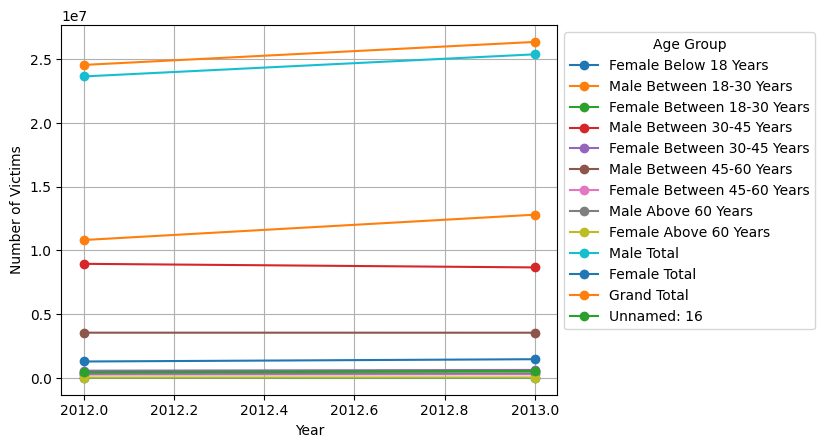

In [6]:
# Making a new column 'Yearly_Total' by summing all columns for each year
yearly_totals = murder_data.groupby('Year').sum(numeric_only=True)
# print(yearly_totals.head())
yearly_totals.plot(kind='line',marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))
# plt.tight_layout()
plt.show()